In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm # Lib para fazer calculos estátisticos

In [23]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [24]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [25]:
base.drop('Unnamed: 0', axis=1, inplace=True)
base

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [26]:
#Criação de X e Y
X = base.iloc[:,2].values
Y = base.iloc[:,0].values
#Criação da correlação entre X e Y
correlacao = np.corrcoef(X,Y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [27]:
X = X.reshape(-1,1) #O primeiro parâmetro irá mandar a numpy descobrir qual o melhor fomarto para essa matriz enquanto o segundo diz a quantidade de colunas
X

array([[160. ],
       [160. ],
       [108. ],
       [258. ],
       [360. ],
       [225. ],
       [360. ],
       [146.7],
       [140.8],
       [167.6],
       [167.6],
       [275.8],
       [275.8],
       [275.8],
       [472. ],
       [460. ],
       [440. ],
       [ 78.7],
       [ 75.7],
       [ 71.1],
       [120.1],
       [318. ],
       [304. ],
       [350. ],
       [400. ],
       [ 79. ],
       [120.3],
       [ 95.1],
       [351. ],
       [145. ],
       [301. ],
       [121. ]])

In [28]:
modelo = LinearRegression()
modelo.fit(X,Y)

LinearRegression()

In [29]:
#Coeficiente
modelo.coef_

array([-0.04121512])

In [30]:
#Intercept
modelo.intercept_

29.599854756163946

In [31]:
#Score R^2
#Quanto da variavel dependente(y) pode ser explicada pela independênte(x)
modelo.score(X,Y)

0.7183433404897299

In [32]:
#Gerando previsões
predict = modelo.predict(X)
predict

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [33]:
#Criação de modelo com a stats model
#Visualizando o r ajustado a r2
# Variavel dependênte(y) e independênte(x) a direita
# OLS -> Ordinary Less Square == Minimo quadradro Ordinario
modelo_ajustado = sm.ols(formula='mpg ~ disp', data=base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           9.38e-10
Time:                        15:41:54   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

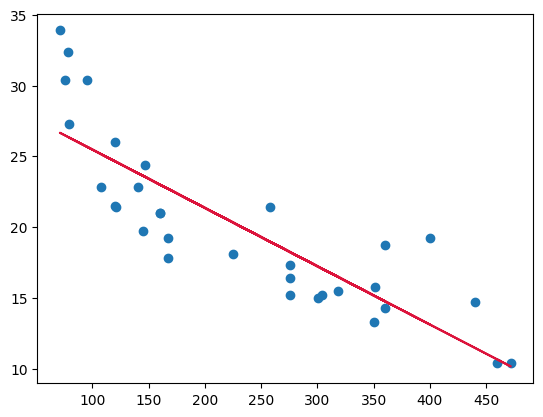

In [34]:
plt.scatter(X,Y)
plt.plot(X, predict, color = 'crimson')

In [35]:
modelo.coef_ + modelo.intercept_ * 200

#Mesma coisa que isso
modelo.predict([[200]])

array([21.35683076])

In [36]:
#Variaveis dependentes -> cyl -> disp -> hp
X1 = base.iloc[:,1:4].values
X1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [37]:
Y1 = base.iloc[:,0].values
Y1

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [38]:
modelo2 = LinearRegression()
modelo2.fit(X1,Y1)
modelo2.score(X1,Y1)

0.7678877440928638

In [39]:
modelo_ajustado2 = sm.ols(formula='mpg ~ cyl+disp+hp',data=base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.743   
Dependent Variable: mpg              AIC:                166.0184
Date:               2023-08-10 15:41 BIC:                171.8814
No. Observations:   32               Log-Likelihood:     -79.009 
Df Model:           3                F-statistic:        30.88   
Df Residuals:       28               Prob (F-statistic): 5.05e-09
R-squared:          0.768            Scale:              9.3346  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     34.1849    2.5908  13.1948  0.0000  28.8780  39.4919
cyl           -1.2274    0.7973  -1.5395  0.1349  -2.8606   0.4057
disp          -0.0188    0.0104  -1.8107  0.0809  -0.0401   0.0025
hp            -0.0147    0.0147  -1.0019  0.3250  -0.0447   0.0153
-----------------------------------------------------------------
Omnibus:              2.942        Durbin-Watson:           1.606
Prob(Omnibus):        0.230        Jarque-Bera (JB):        2.558
Skew:                 0.675        Prob(JB):                0.278
Kurtosis:             2.692        Condition No.:           1512 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [40]:
novo = np.array([4,200,100])
novo = novo.reshape(1,-1)
modelo2.predict(novo)

array([24.03968887])